In [31]:
import pickle
import nltk

In [21]:
def read_documents(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
        documents = [line.split('\n') for line in data]
    
    return documents

In [22]:
title_docs = read_documents("data/washington_times_title.pk")
content_docs = read_documents("data/washington_times_contents.pk")

In [23]:
print(len(title_docs))
print(title_docs)

180
[['Coronavirus a crisis fit for a new world order - Washington Times'], ['Coronavirus a crisis fit for a new world order - Washington Times'], ["COVID-19 in the U.S.: Doomsday numbers just don't add up ..."], ["COVID-19 in the U.S.: Doomsday numbers just don't add up ..."], ['FDA approves South Korean kits for COVID-19 - Washington Times'], ['FDA approves South Korean kits for COVID-19 - Washington Times'], ['H.R. 6666 a devil of a COVID-19 government surveillance plot ...'], ['H.R. 6666 a devil of a COVID-19 government surveillance plot ...'], ["After an overreaction to COVID-19, it's time to liberate America ..."], ["After an overreaction to COVID-19, it's time to liberate America ..."], ['Taking constitutional rights seriously during COVID-19 pandemic ...'], ['Taking constitutional rights seriously during COVID-19 pandemic ...'], ['Special Section - Coronavirus (COVID-19) pandemic updates ...'], ['Special Section - Coronavirus (COVID-19) pandemic updates ...'], ['YouTube censors

In [37]:
print(len(content_docs))
print(len(content_docs[0]))
print(type(len(content_docs[0])))

152
27
<class 'int'>


In [41]:
total_tokens = [token for msg in content_docs for token in str(content_docs).split()]
print(len(total_tokens))

15782312


In [48]:
print(total_tokens[3:100])

['crisis', 'is', 'a', 'means', 'by', 'which', 'Democrats', 'achieve', 'their', 'political', 'ends', '—', 'and', 'it', 'is;', 'just', 'think', 'of', 'their', 'famous', '“never', 'let', 'a', 'crisis', 'go', 'to', 'waste”', 'playbook', '—', 'then', 'imagine', 'what', 'coronavirus', 'means', 'to', 'the', "globalists.',", "'What", 'a', 'dizzying', 'opportunity', 'for', 'them', 'to', 'achieve', 'massive', "goals.',", "'This", 'is', 'new', 'world', 'order', 'time', '—', 'one', 'world', 'order', 'time,', 'in', 'the', 'teachings', 'of', 'the', 'Bible', "believers.',", "'Not", 'only', 'is', 'America’s', 'economy', 'crashing.', 'Not', 'only', 'have', 'the', 'world’s', 'producers', 'come', 'to', 'a', 'grinding', 'halt.', 'But', 'citizens', 'are', 'in', 'fear.', 'They', 'don’t', 'know', 'who', 'or', 'what', 'to', 'believe.', 'They’re', 'hunkering']


In [42]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

12803
[('the', 840864), ('to', 457824), ('and', 434720), ('of', 431528), ('a', 266456), ('in', 257488), ('that', 177840), ('is', 170392), ('for', 147744), ('are', 105640)]


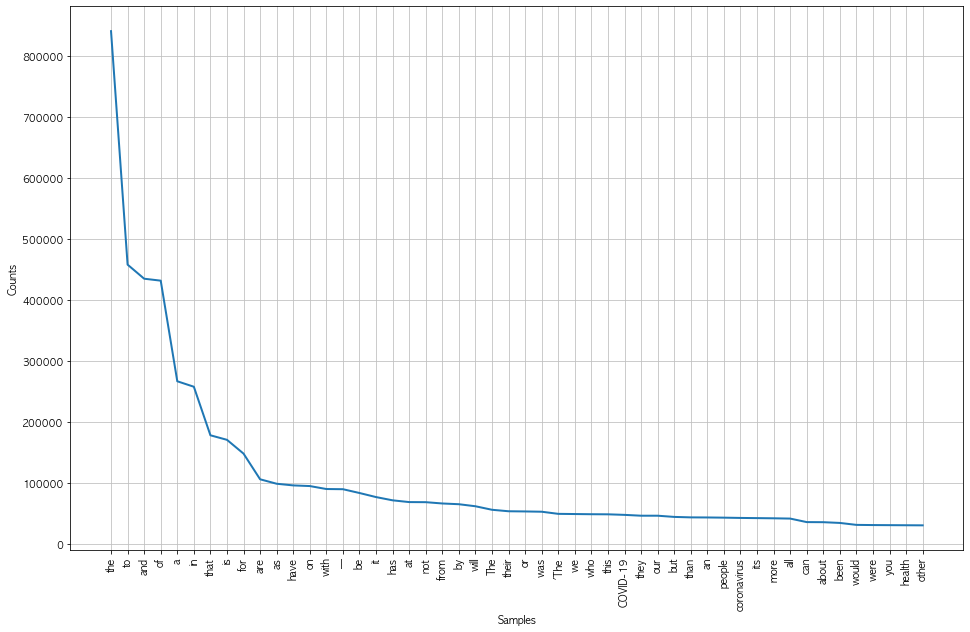

In [43]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [74]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 
stop_words.add('The')
stop_words.add('-')
stop_words.add('—')
stop_words.add('')
stop_words.add('And')
stop_words.add('In')
stop_words.add('would')
stop_words.add('I')
stop_words.add('But')
stop_words.add('but')
stop_words.add('A')
stop_words.add('They')
stop_words.add('We')
stop_words.add('It')

total_tokens_2 = []  ### 저장
for w in total_tokens: 
    if w not in stop_words: 
        total_tokens_2.append(w) 

In [69]:
import re
# 3
pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
total_tokens_2 = [pattern3.sub("", doc) for doc in total_tokens_2]

# 4
pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
total_tokens_2 = [pattern4.sub("", doc) for doc in total_tokens_2]

In [75]:
print(len(total_tokens))
print(len(total_tokens_2))

15782312
9323832


In [76]:
text = nltk.Text(total_tokens_2, name='NMSC')
print(len(set(text.tokens)))

9571


In [77]:
print(text.vocab().most_common(20))

[('COVID19', 63840), ('coronavirus', 53200), ('people', 49552), ('virus', 43776), ('said', 42712), ('government', 32528), ('health', 32224), ('one', 28424), ('China', 27816), ('US', 24776), ('pandemic', 24320), ('Mr', 23864), ('New', 23560), ('new', 23408), ('time', 22496), ('also', 22192), ('cases', 22040), ('many', 21736), ('United', 21432), ('It', 20672)]


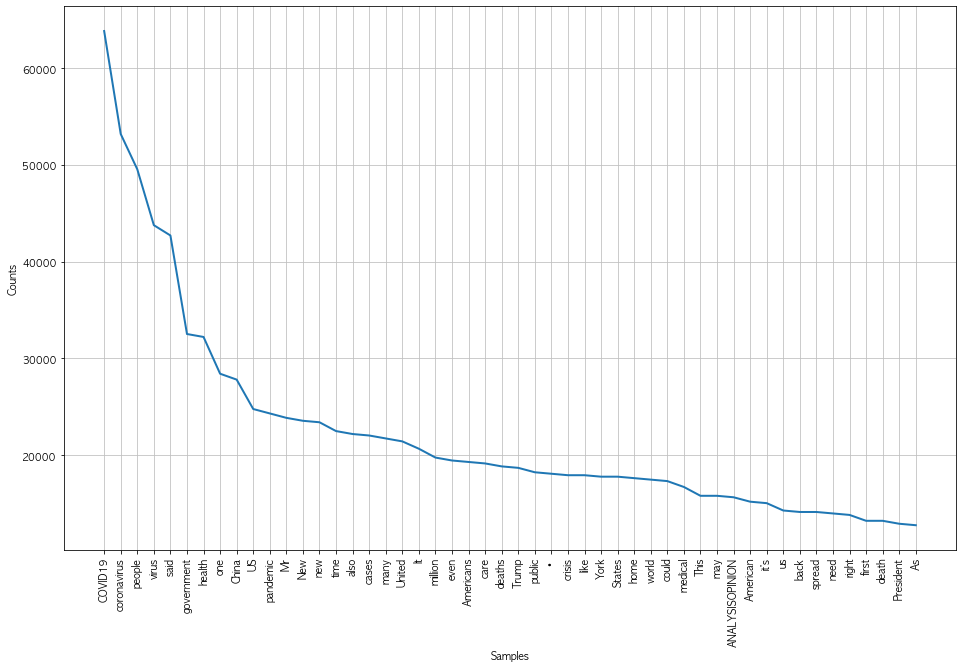

In [78]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [83]:
from wordcloud import WordCloud

data = text.vocab().most_common(100)

In [81]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 245 kB/s eta 0:00:01


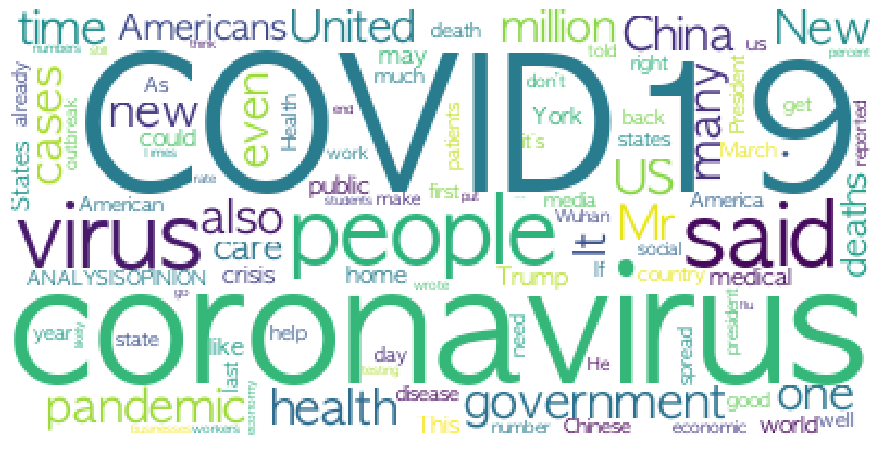

In [84]:
# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()